In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading all the data sets

In [4]:
train_df=pd.read_csv('titanic_train.csv')
test_df=pd.read_csv('titanic_test.csv')
gender_submission_df=pd.read_csv('titanic_gender_submission.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# preprocessing for missing values

In [12]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [13]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [14]:
train_df.drop('Cabin', axis=1, inplace=True)

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#  converting catogarical data(names,sex and embarked) to numerical data(fare,survived etc)

In [17]:
train_df['Sex']=train_df['Sex'].map({'male':0 ,'female':1})

In [18]:
train_df['Embarked']=train_df['Embarked'].map({'S':0 ,'C':1 , 'Q' : 2})

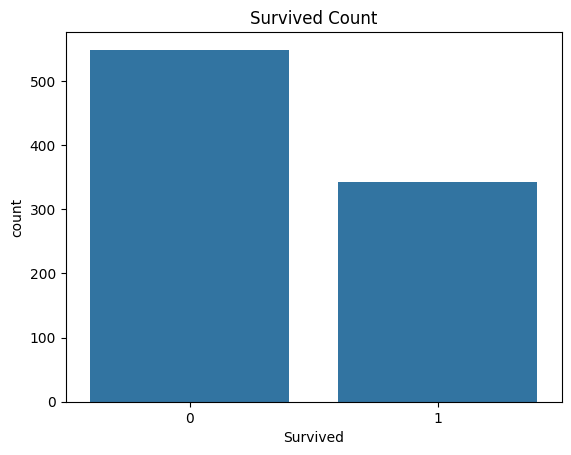

In [19]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survived Count')
plt.show()

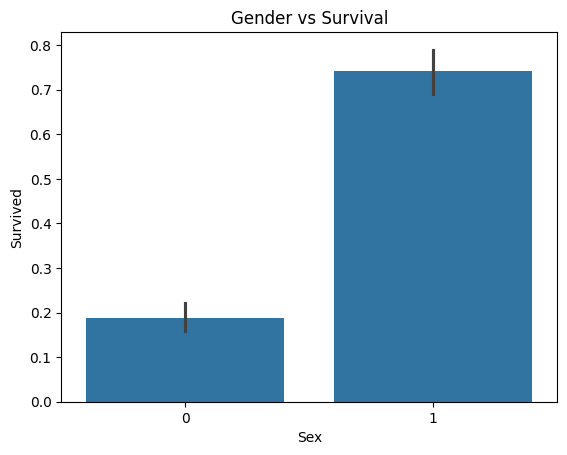

In [20]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Gender vs Survival')
plt.show()

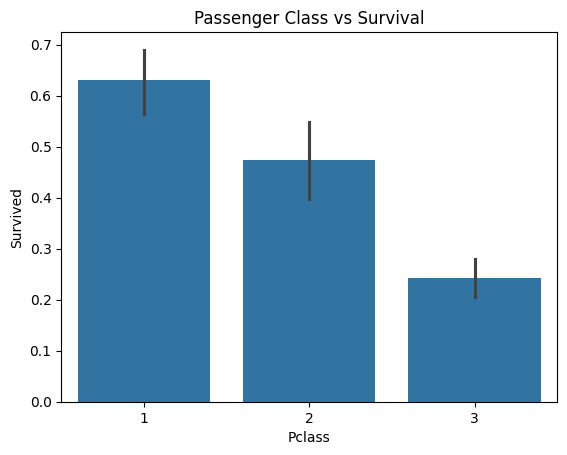

In [21]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Passenger Class vs Survival')
plt.show()

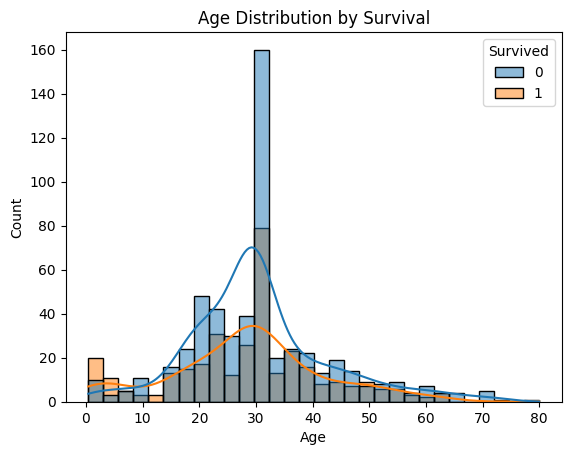

In [22]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [24]:
train_df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [25]:
train_df.drop('Ticket' , axis=1,inplace=True)
train_df.drop('Name' , axis=1,inplace=True)

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


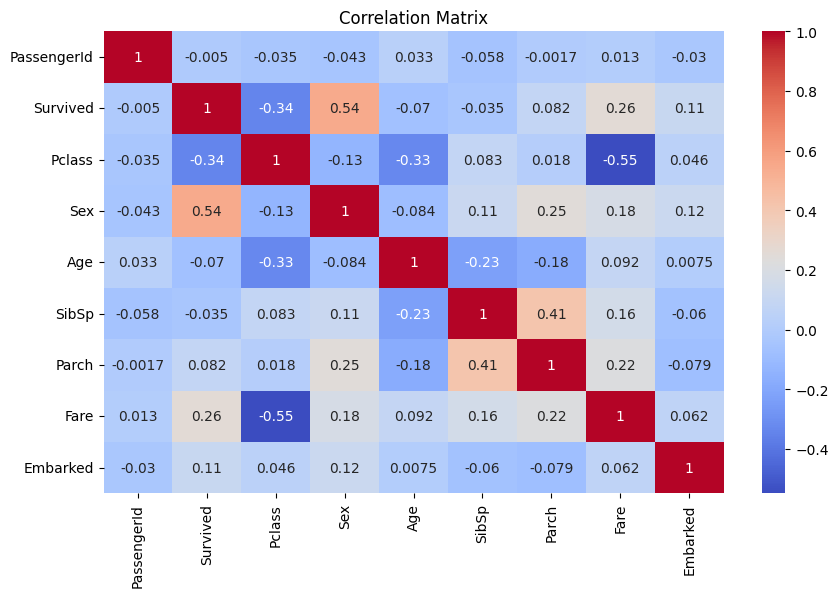

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,0,2
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [30]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df.drop('Cabin', axis=1, inplace=True, errors='ignore')
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [31]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
X = train_df[features]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
y_pred = model.predict(X_val)

In [34]:
accuracy_score(y_val, y_pred)

0.7988826815642458

In [35]:
confusion_matrix(y_val, y_pred)

array([[89, 16],
       [20, 54]], dtype=int64)

In [36]:
classification_report(y_val, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.85      0.83       105\n           1       0.77      0.73      0.75        74\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [37]:
test_pred = model.predict(test_df[features])
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('titanic_submission.csv', index=False)

In [38]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [39]:
accuracy_score(y_val, y_pred)

0.7988826815642458

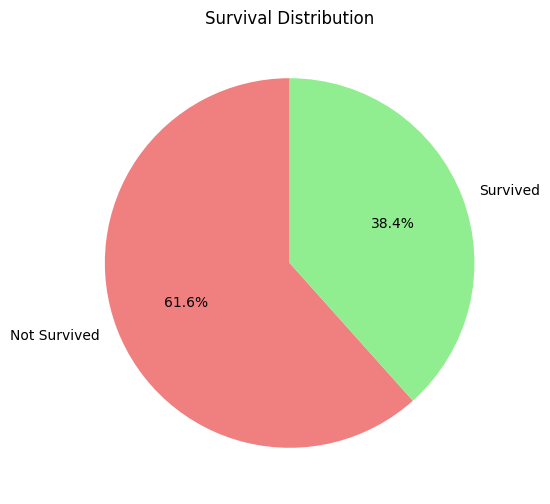

In [40]:
import matplotlib.pyplot as plt

# Count survival values
survived_counts = train_df['Survived'].value_counts()

# Labels for the pie chart
labels = ['Not Survived', 'Survived']
colors = ['lightcoral', 'lightgreen']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.show()


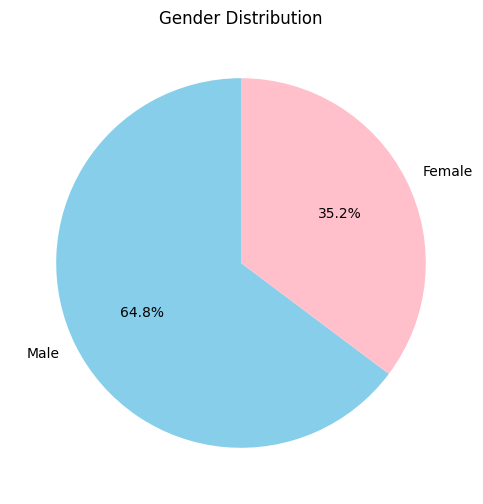

In [41]:
gender_counts = train_df['Sex'].value_counts()

# Map 0 = male, 1 = female (if already encoded)
labels = ['Male', 'Female'] if train_df['Sex'].max() == 1 else gender_counts.index
colors = ['skyblue', 'pink']

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


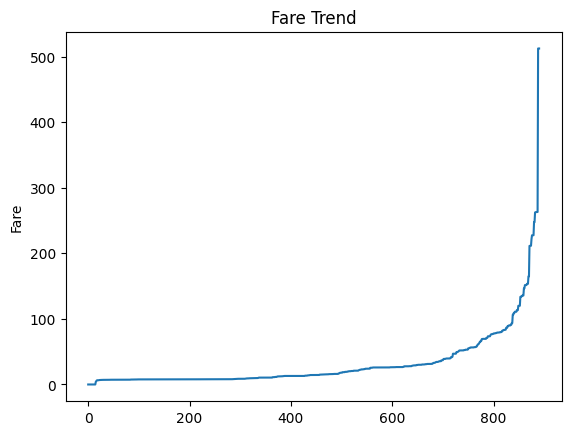

In [42]:
# Example: plotting Fare trend by index
train_df.sort_values('Fare').reset_index(drop=True)['Fare'].plot(kind='line')
plt.title('Fare Trend')
plt.ylabel('Fare')
plt.show()


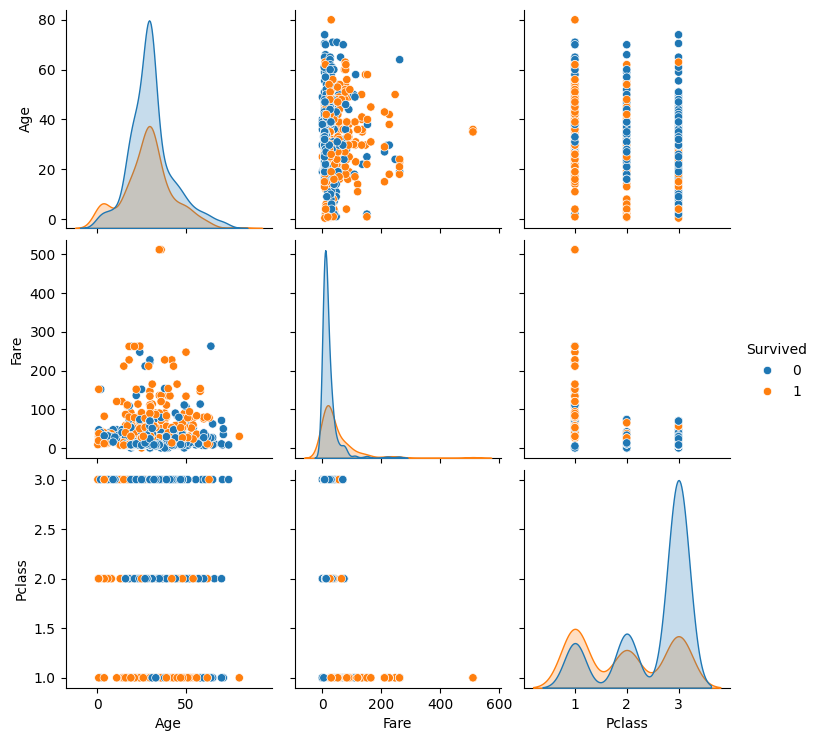

In [43]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()


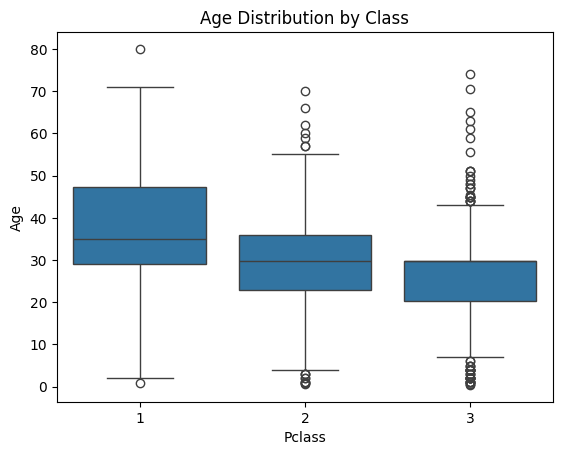

In [44]:
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Age Distribution by Class')
plt.show()


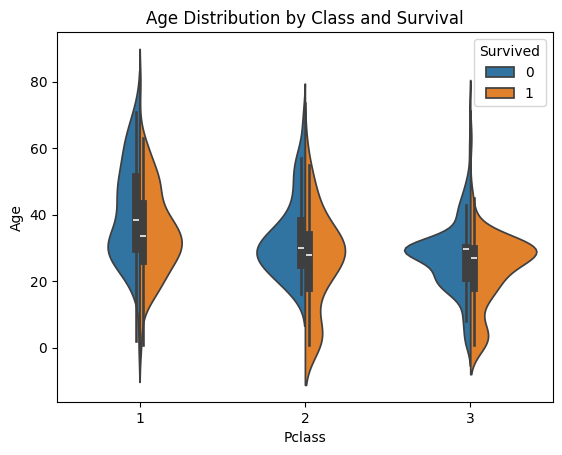

In [45]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df, split=True)
plt.title('Age Distribution by Class and Survival')
plt.show()

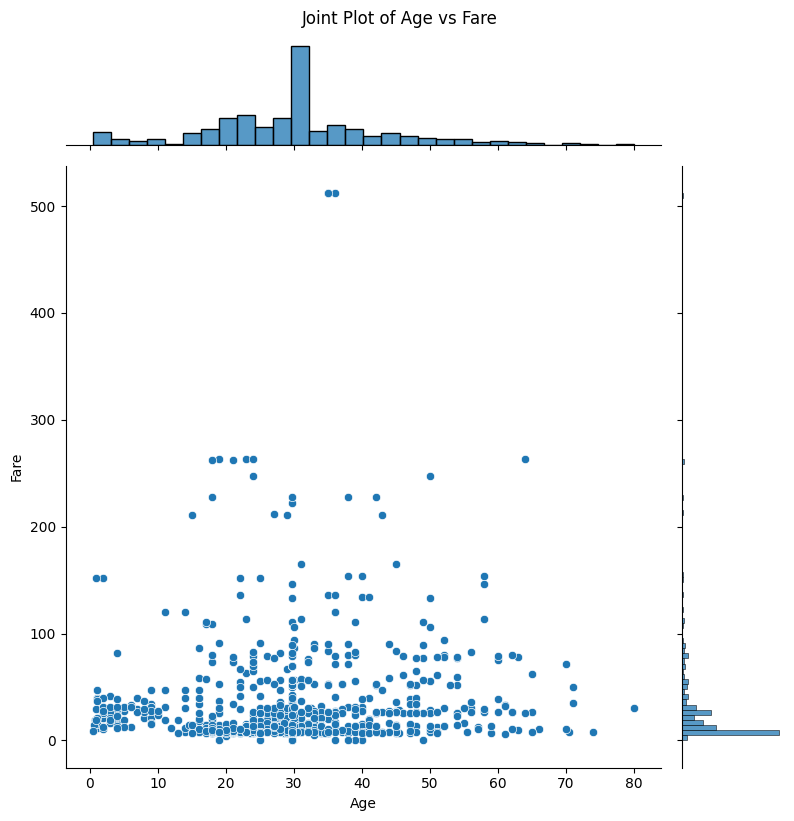

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in 'Age' or 'Fare'
joint_df = train_df[['Age', 'Fare']].dropna()

# Create jointplot
sns.jointplot(x='Age', y='Fare', data=joint_df, kind='scatter', height=8)

plt.suptitle('Joint Plot of Age vs Fare', y=1.02)  # Slightly lift title
plt.show()


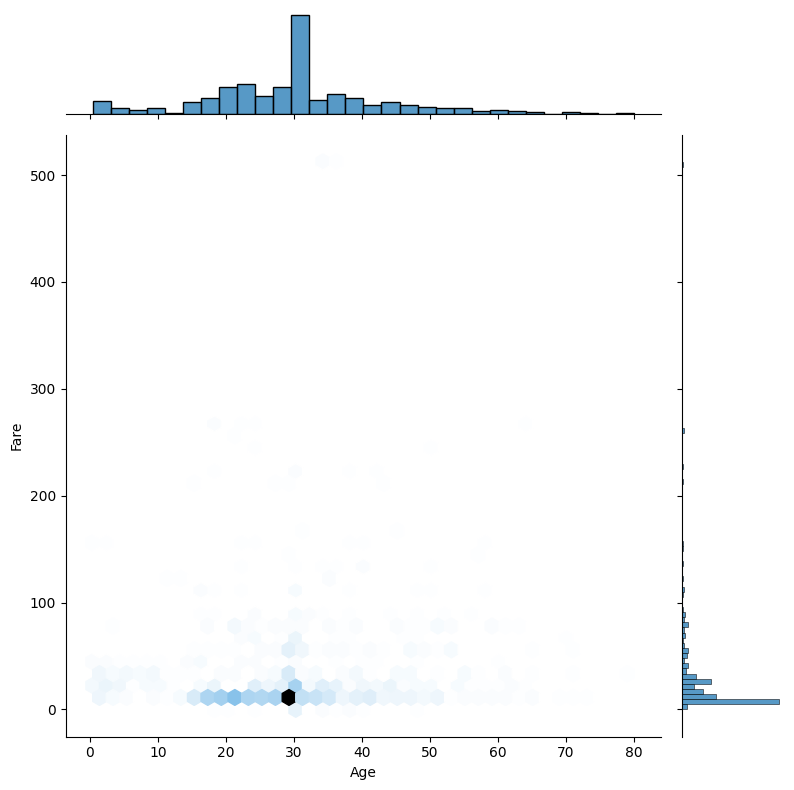

In [47]:
sns.jointplot(x='Age', y='Fare', data=joint_df, kind='hex', height=8)


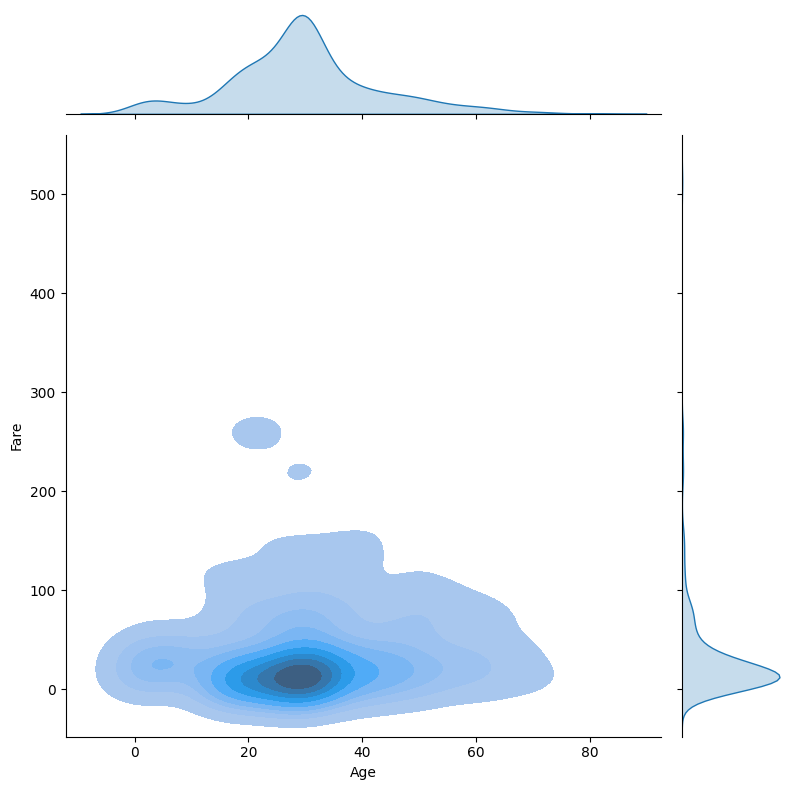

In [48]:
sns.jointplot(x='Age', y='Fare', data=joint_df, kind='kde', fill=True, height=8)


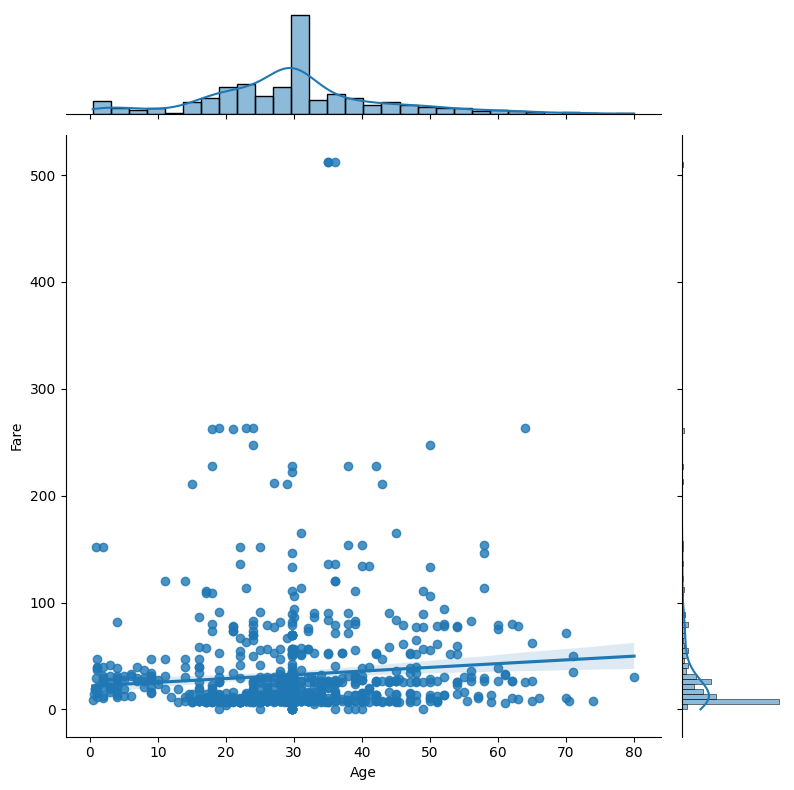

In [49]:
sns.jointplot(x='Age', y='Fare', data=joint_df, kind='reg', height=8)
